In [1]:
import matplotlib as mp
import seaborn as sb
import pandas as pd 
import numpy as np
from numpy import math
from matplotlib import pyplot as plt



In [2]:
data=pd.read_csv("ipl_data.csv")
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [3]:
data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [4]:
data.drop(["method"],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  umpire1          816 non-null    object 
 15  umpire2          816 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory usage: 102.1+ KB


In [5]:
temp=pd.DataFrame({"winner": data["winner"]})
counts_win=temp.value_counts()
counts_win

winner                     
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
dtype: int64

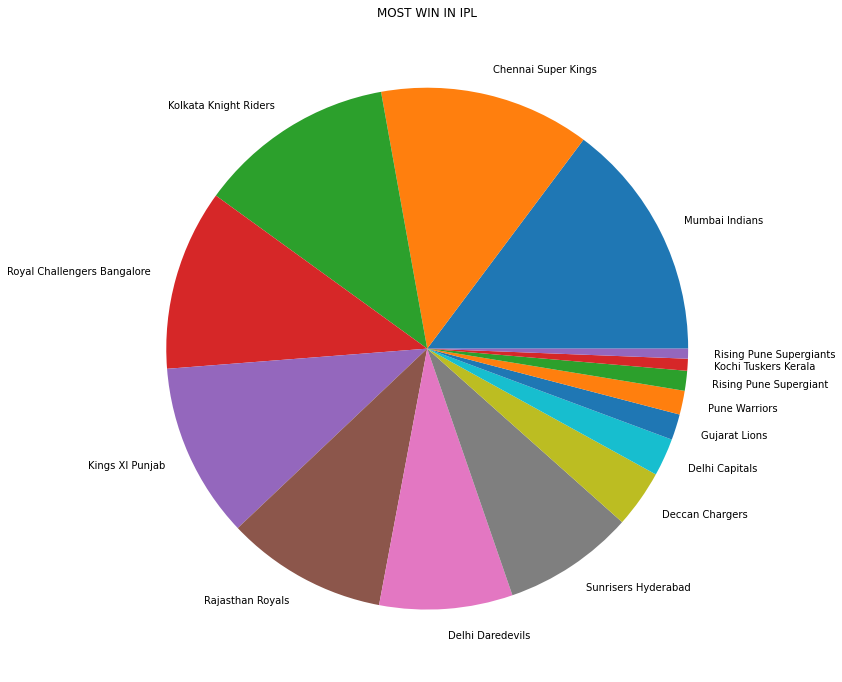

In [6]:
labels=[X[0] for X in counts_win.keys()]
bar ,ax = plt.subplots(figsize=(20,12))
ax=plt.pie(x=counts_win,labels=labels)
plt.title("MOST WIN IN IPL")
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


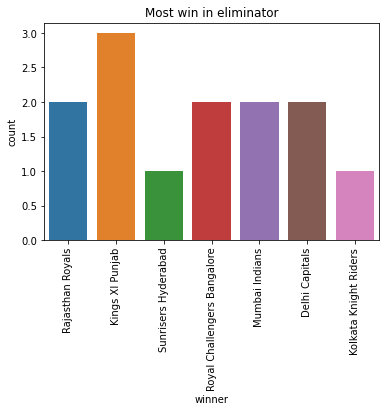

In [7]:
sb.countplot(data["winner"][data["eliminator"]=="Y"],data=data)
labels=[X[0] for X in counts_win.keys()]
bar ,ax = plt.subplots(figsize=(20,12))
ax=plt.pie(x=counts_win,labels=labels)
plt.title("MOST WIN IN IPL")
plt.show()plt.xticks(rotation=90)
plt.title("Most win in eliminator")
plt.show()

In [14]:
#WINNING DECSION

teams=data["winner"].unique()
teams
winning_decsion=pd.DataFrame([],columns=["winner","result","times"])

for id , element in enumerate(teams):
    temp_run=data[(data["winner"]==element)&(data["result"]=="runs")]
    temp_wicket=data[(data["winner"]==element)&(data["result"]=="wickets")]
    
    
    winning_decsion=winning_decsion.append({"winner":element,"result":"runs","times":
                                            temp_run["winner"].count()}
                                           , ignore_index=True)
    winning_decsion=winning_decsion.append({"winner":element,"result":"wickets","times":temp_wicket["winner"].count()}
                                           , ignore_index=True)

In [15]:
winning_decsion

,winner,result,times
0,Kolkata Knight Riders,runs,41
1,Kolkata Knight Riders,wickets,57
2,Chennai Super Kings,runs,53
3,Chennai Super Kings,wickets,53
4,Delhi Daredevils,runs,25
5,Delhi Daredevils,wickets,42
6,Royal Challengers Bangalore,runs,38
7,Royal Challengers Bangalore,wickets,51
8,Rajasthan Royals,runs,28
9,Rajasthan Royals,wickets,51


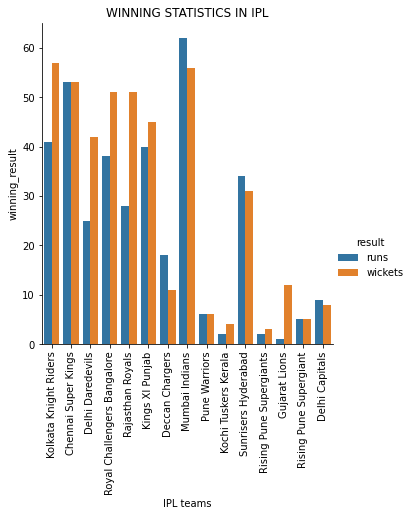

In [16]:
sb.catplot(x="winner",y="times",hue="result",data=winning_decsion,kind="bar")
plt.xticks(rotation=90)
plt.title("WINNING STATISTICS IN IPL")
plt.xlabel("IPL teams")
plt.ylabel("winning_result")
plt.show()

In [17]:
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan


<AxesSubplot:>

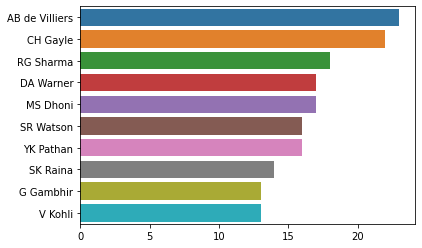

In [18]:
sb.barplot(x=data["player_of_match"].value_counts().head(10).values,
          y=data["player_of_match"].value_counts().head(10).index,data=data)